Done By  
#### Jashith V.P,  ID : CUTM01124
www.linkedin.com/in/jashith-v-p

-----------------------------------------

# Data Cleaninig

Data cleaning is the process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted.This data is usually not necessary or helpful when it comes to analyzing data because it may hinder the process or provide inaccurate results. Let us look through the data for inconsistencies and clean it.

#### About the dataset?


The dataset is of  Beijing from 2011 to 2017, fetching from Lianjia.com. It includes URL, ID, Lng, Lat, CommunityID, TradeTime, DOM(days on market), Followers, Total price, Price, Square, Living Room, number of Drawing room, Kitchen and Bathroom, Building Type, Construction time. renovation condition, building structure, Ladder ratio( which is the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average), elevator, Property rights for five years（It's related to China restricted purchase of houses policy), Subway, District, Community average price.


Most data is traded in 2011-2017, some of them is traded in Jan,2018, and some is even earlier(2010,2009)

All the data was fetching from https://bj.lianjia.com/chengjiao.

In [3]:
library(ggplot2)
library(reshape2)
library(tidyverse)
library(lubridate)
library(dplyr)

Due to the fact that the original csv file includes Chinese characters in the " Floor " column, reading it using UTF-8 but that doesn’t help, however we can see that the floor number always comes after the space in the UTF encoding. so it’s a simple question of extracting the character that comes after the space.

In [5]:
data <- read_csv("../beijing.csv", locale = locale(encoding = "UTF-8")) %>% 
              mutate(floor = str_trim(str_extract(floor,"( .*)"), side = "both"))

Parsed with column specification:
cols(
  .default = col_double(),
  url = col_character(),
  tradeTime = col_date(format = ""),
  floor = col_character(),
  constructionTime = col_character()
)
See spec(...) for full column specifications.
Warning message:
"226701 parsing failures.
  row col expected       actual             file
92217  id a double BJ0000614981 '../beijing.csv'
92218  id a double BJ0000614985 '../beijing.csv'
92219  id a double BJ0000614991 '../beijing.csv'
92220  id a double BJ0000614992 '../beijing.csv'
92221  id a double BJ0000614999 '../beijing.csv'
..... ... ........ ............ ................
See problems(...) for more details.
"

In [6]:
dim(data)

[1] 318851     26

In [7]:
str(data)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	318851 obs. of  26 variables:
 $ url                : chr  "https://bj.lianjia.com/chengjiao/101084782030.html" "https://bj.lianjia.com/chengjiao/101086012217.html" "https://bj.lianjia.com/chengjiao/101086041636.html" "https://bj.lianjia.com/chengjiao/101086406841.html" ...
 $ id                 : num  1.01e+11 1.01e+11 1.01e+11 1.01e+11 1.01e+11 ...
 $ Lng                : num  116 116 117 116 116 ...
 $ Lat                : num  40 39.9 39.9 40.1 39.9 ...
 $ Cid                : num  1.11e+12 1.11e+12 1.11e+12 1.11e+12 1.11e+12 ...
 $ tradeTime          : Date, format: "2016-08-09" "2016-07-28" ...
 $ DOM                : num  1464 903 1271 965 927 ...
 $ followers          : num  106 126 48 138 286 57 167 138 218 134 ...
 $ totalPrice         : num  415 575 1030 298 392 ...
 $ price              : num  31680 43436 52021 22202 48396 ...
 $ square             : num  131 132 198 134 81 ...
 $ livingRoom         : num  2 2 3 3 2 1

* url: the url which fetches the data  
* id: the id of transaction  
* Lng: and Lat coordinates, using the BD09 protocol.
* Cid: community id
* tradeTime: the time of transaction
* DOM: active days on market.
* followers: the number of people follow the transaction.
* totalPrice: the total price
* price: the average price by square
* square: the square of house
* livingRoom: the number of living room
* drawingRoom: the number of drawing room
* kitchen: the number of kitchen
* bathroom the number of bathroom
* floor: the height of the house. I will turn the Chinese characters to English in the next version.
* buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ).
* constructionTime: the time of construction
* renovationCondition: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 )
* buildingStructure: including unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ).
* ladderRatio: the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average.
* elevator: have ( 1 ) or not have elevator( 0 )
* fiveYearsProperty: if the owner have the property for less than 5 years,

Dropping variable that has nothing to do with the analysis

In [8]:
data <-  select(data,-id,-url)

Finding the number of unique value for each attribute

In [9]:
sapply(data, function(x){length(unique(factor(x)))})

Lng                 Lat                 Cid           tradeTime 
               3995                3993                4035                2560 
                DOM           followers          totalPrice               price 
                552                 547                5780               80042 
             square          livingRoom         drawingRoom             kitchen 
              18298                  11                   7                   5 
           bathRoom               floor        buildingType    constructionTime 
                 18                  41                  13                  74 
renovationCondition   buildingStructure         ladderRatio            elevator 
                  5                   7                 183                   3 
  fiveYearsProperty              subway            district    communityAverage 
                  3                   3                  13                4073

converting the variable type

In [10]:
cols <- c("Cid", "livingRoom","kitchen","bathRoom","floor",
          "buildingType","renovationCondition","buildingStructure",
          "elevator","fiveYearsProperty","subway","district","drawingRoom")

data[cols] <- lapply(data[cols], factor) 
data$constructionTime <- as.numeric(data$constructionTime)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

Getting the summary of all the attributes

In [11]:
summary(data)

      Lng             Lat                   Cid           tradeTime         
 Min.   :116.1   Min.   :39.63   1111027378998:  1526   Min.   :2002-06-01  
 1st Qu.:116.3   1st Qu.:39.89   1111027375945:  1514   1st Qu.:2013-11-30  
 Median :116.4   Median :39.93   1111027380051:  1350   Median :2015-09-12  
 Mean   :116.4   Mean   :39.95   1111027381003:  1334   Mean   :2015-04-17  
 3rd Qu.:116.5   3rd Qu.:40.00   1111027382209:  1247   3rd Qu.:2016-07-31  
 Max.   :116.7   Max.   :40.25   1111027379657:  1174   Max.   :2018-01-28  
                                 (Other)      :310706                       
      DOM            followers         totalPrice          price       
 Min.   :   1.00   Min.   :   0.00   Min.   :    0.1   Min.   :     1  
 1st Qu.:   1.00   1st Qu.:   0.00   1st Qu.:  205.0   1st Qu.: 28050  
 Median :   6.00   Median :   5.00   Median :  294.0   Median : 38737  
 Mean   :  28.82   Mean   :  16.73   Mean   :  349.0   Mean   : 43530  
 3rd Qu.:  37.00   3rd Q

There are missing values in some of the attribute which has to be removed. Lets check what percentage of the data is missing. so that we can decide whether to remove those value or impute the values


In [12]:
missing_vals <- sapply(data, function(x){sum(is.na(x))})
per_missing <- data.frame(missing_vals,percent_missing = paste0(round((missing_vals/nrow(data))*100,2),'%'))%>% arrange(desc(missing_vals))
print(per_missing)

   missing_vals percent_missing
1        157977          49.55%
2         19283           6.05%
3           463           0.15%
4            32           0.01%
5            32           0.01%
6            32           0.01%
7            32           0.01%
8            32           0.01%
9            32           0.01%
10            2              0%
11            0              0%
12            0              0%
13            0              0%
14            0              0%
15            0              0%
16            0              0%
17            0              0%
18            0              0%
19            0              0%
20            0              0%
21            0              0%
22            0              0%
23            0              0%
24            0              0%


The graphical reprecentation of the missing value

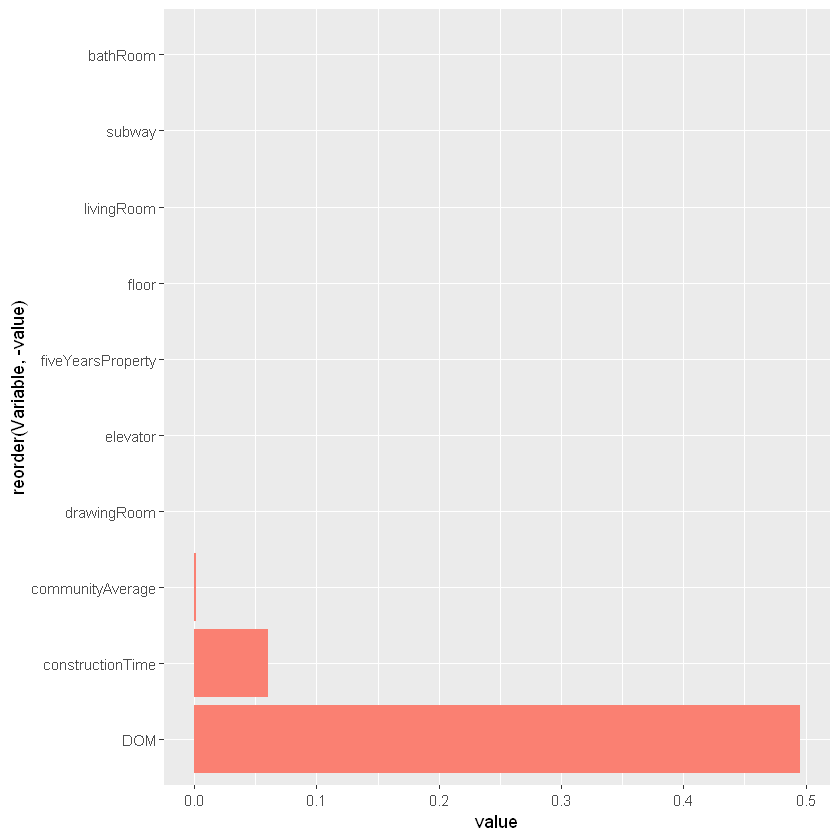

In [13]:
x1 <- map_df(data, function(x){sum(is.na(x))})
missing <- x1 %>% gather(key = "Variable") %>% filter(value > 0) %>% mutate(value = value/nrow(data))
ggplot(missing, aes(x = reorder(Variable, -value),y = value)) + 
  geom_bar(stat = "identity", fill = "salmon")+
  coord_flip()

This suggest that only DOM has significant amount of missing value and only DOM needs to be imputed and rest all the NA's can be removed.  

Removing missing values except for DOM

In [14]:
completeFun <- function(df, desiredCols) {
  completeVec <- complete.cases(df[, desiredCols])
  return(df[completeVec, ])
}

data <- completeFun(data, c("bathRoom","subway","livingRoom","floor","fiveYearsProperty",
                            "elevator","drawingRoom","communityAverage","constructionTime"))

describing DOM

In [15]:
des <- psych::describe(data$DOM)
print(des)

   vars      n  mean   sd median trimmed mad min  max range skew kurtosis   se
X1    1 153260 29.54 50.6      7   18.28 8.9   1 1677  1676 4.25    43.83 0.13


The Na DOM could mean that the house may be sold in 0 days,  since the beijing 
very fast-paced with 50% of the offers staying under 6 days on the portal!. Checking if thats the case

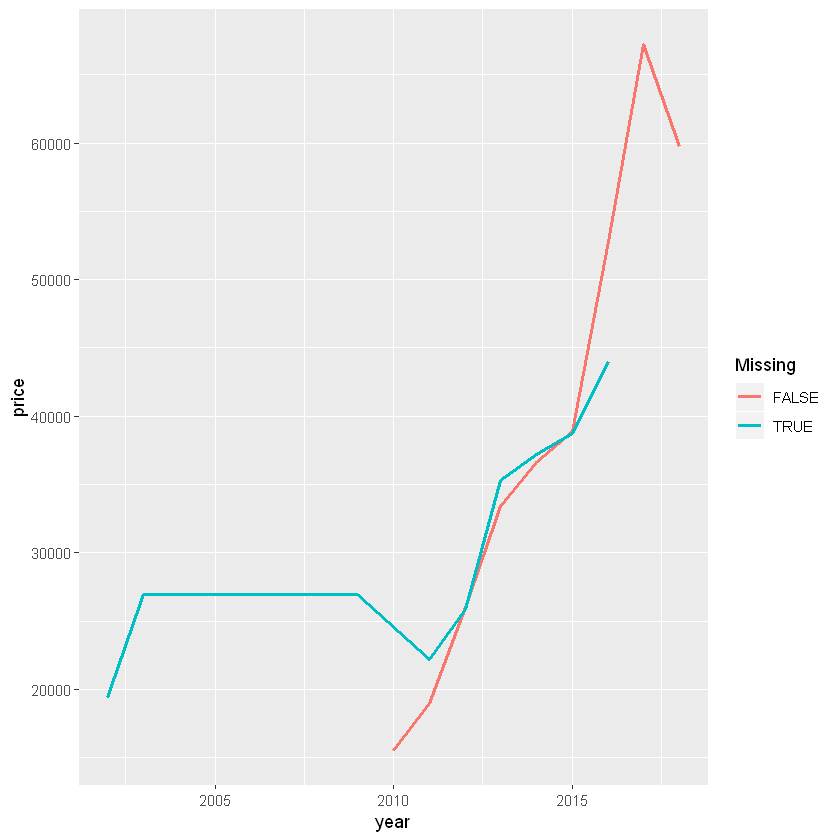

In [16]:
data2 <-data[,c("tradeTime","price","DOM")]
data2$Missing <- is.na(data2$DOM)
data2 <- data2 %>%
  group_by( year = year(tradeTime),Missing) %>%
  summarise(price = mean(price))



ggplot(data = data2, aes(x = year, y = price))+
  geom_line(aes(color = Missing), size = 1)

This proves the missing values in DOM are missing and not houses sold in 0 days. Lets check the qurtile plot for DOM 

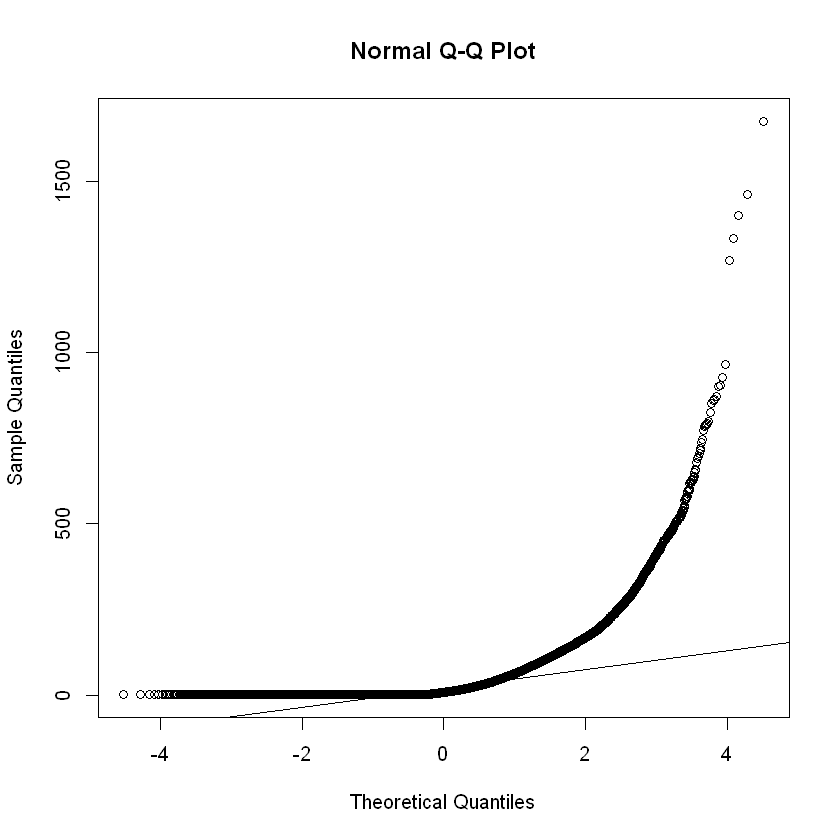

In [17]:
qqnorm(data$DOM)
qqline(data$DOM)

We are going to use the median to impute the data, because the data is positively skewed

In [18]:
data$DOM<- ifelse(is.na(data$DOM),median(data$DOM,na.rm=TRUE),data$DOM)
missing_vals <- sapply(data, function(x){sum(is.na(x))})
print(missing_vals)

                Lng                 Lat                 Cid           tradeTime 
                  0                   0                   0                   0 
                DOM           followers          totalPrice               price 
                  0                   0                   0                   0 
             square          livingRoom         drawingRoom             kitchen 
                  0                   0                   0                   0 
           bathRoom               floor        buildingType    constructionTime 
                  0                   0                   0                   0 
renovationCondition   buildingStructure         ladderRatio            elevator 
                  0                   0                   0                   0 
  fiveYearsProperty              subway            district    communityAverage 
                  0                   0                   0                   0 


#### Cleaning factor variable

In [20]:
table(data$buildingType)
# "NaN" values are removed since it's a very low portion on the data
data <- data[!data$buildingType == "NaN",]
data$buildingType <- droplevels(data$buildingType)
data$buildingType <- factor(data$buildingType,labels = c("Tower","Bungalow","Plate/Tower","Plate"))


      Tower    Bungalow Plate/Tower       Plate 
      78053          44       54832      164772 

In [ ]:
table(data$buildingType)

In [22]:
table(data$renovationCondition)
data$renovationCondition <- droplevels(data$renovationCondition)
data$renovationCondition <- factor(data$renovationCondition,labels = c("Other","Rough","Simplicit","Hardcover"))


    Other     Rough Simplicit Hardcover 
   109466      4893     73733    109609 

In [23]:
table(data$renovationCondition)


    Other     Rough Simplicit Hardcover 
   109466      4893     73733    109609 

In [24]:
table(data$buildingStructure)
data$buildingStructure <- droplevels(data$buildingStructure)
data$buildingStructure <- factor(data$buildingStructure,labels = c("Unavailable","Mixed","Brick/Wood","Brick/Concrete",
                                                                   "Steel","Steel/Concrete"))


     0      1      2      3      4      5      6 
     0     16 110651     61  13473    154 173346 

In [25]:
table(data$buildingStructure)


   Unavailable          Mixed     Brick/Wood Brick/Concrete          Steel 
            16         110651             61          13473            154 
Steel/Concrete 
        173346 

In [26]:
data$elevator <- factor(data$elevator,labels = c("No_elevator","Has_Elevator")) 
data$subway <- factor(data$subway,labels = c("No_Subway","Has_Subway"))
data$fiveYearsProperty <- factor(data$fiveYearsProperty,labels = c("Ownership > 5y","Ownership < 5y"))

In [27]:
table(data$district)
data$district <- factor(data$district,labels = c("DongCheng","FengTai","DaXing","FaXing","FangShang","ChangPing",
                                                 "ChaoYang","HaiDian","ShiJingShan","XiCheng","TongZhou","ShunYi","MenTouGou"))


     1      2      3      4      5      6      7      8      9     10     11 
 15930  27847   2210  14383   2622  35791 101139  35515  10430  29205  12119 
    12     13 
  1617   8893 

In [28]:
table(data$district)


  DongCheng     FengTai      DaXing      FaXing   FangShang   ChangPing 
      15930       27847        2210       14383        2622       35791 
   ChaoYang     HaiDian ShiJingShan     XiCheng    TongZhou      ShunYi 
     101139       35515       10430       29205       12119        1617 
  MenTouGou 
       8893 

#### Cleaning continious variable

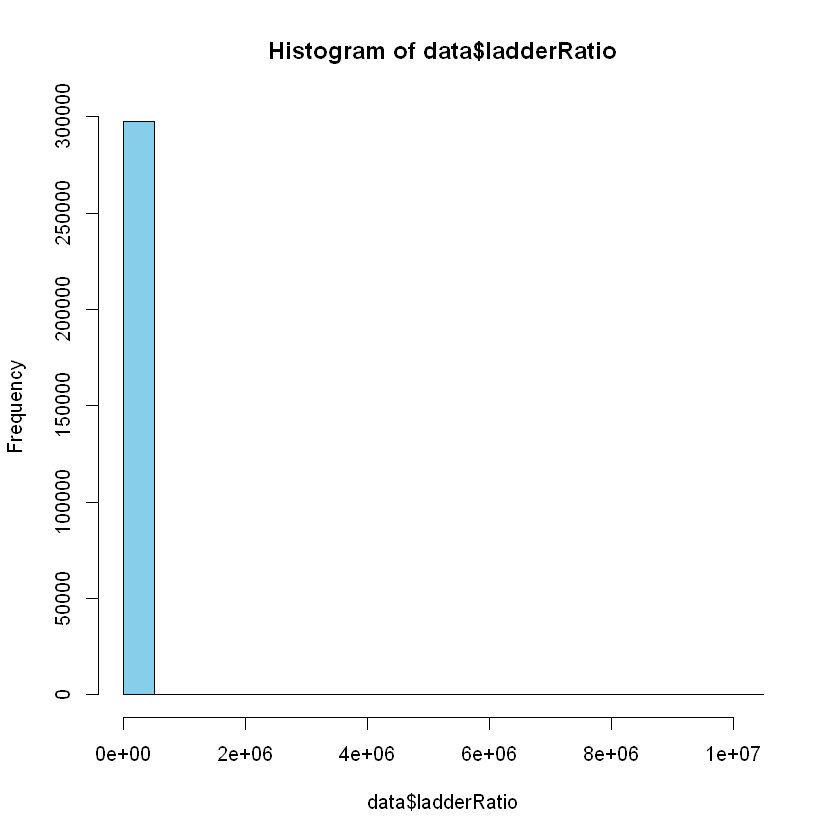

In [29]:
hist(data$ladderRatio,col='skyblue')

few values in ladder ratio is marked extremely high this can be true ladder ratio is described as how many ladders a resident have on average.

checking the ladderRatio coloumn


In [30]:
data[data$ladderRatio>5,"ladderRatio"]

ladderRatio
10009400
10009400


removing these values

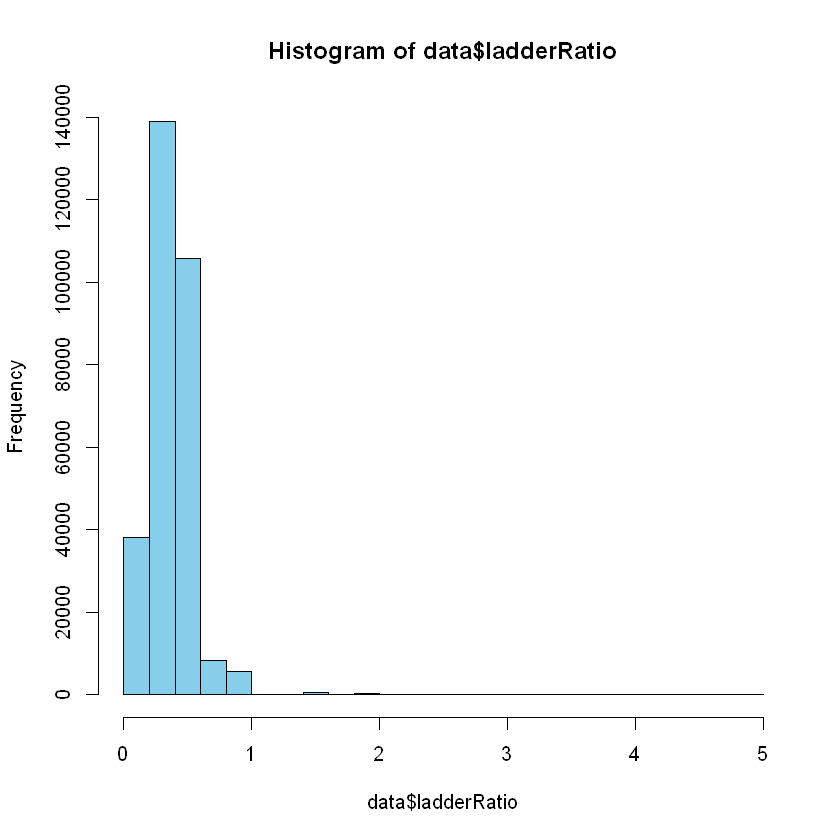

In [32]:
data <- data[!data$ladderRatio>5,]
hist(data$ladderRatio,col='skyblue')

checking the price distribtion

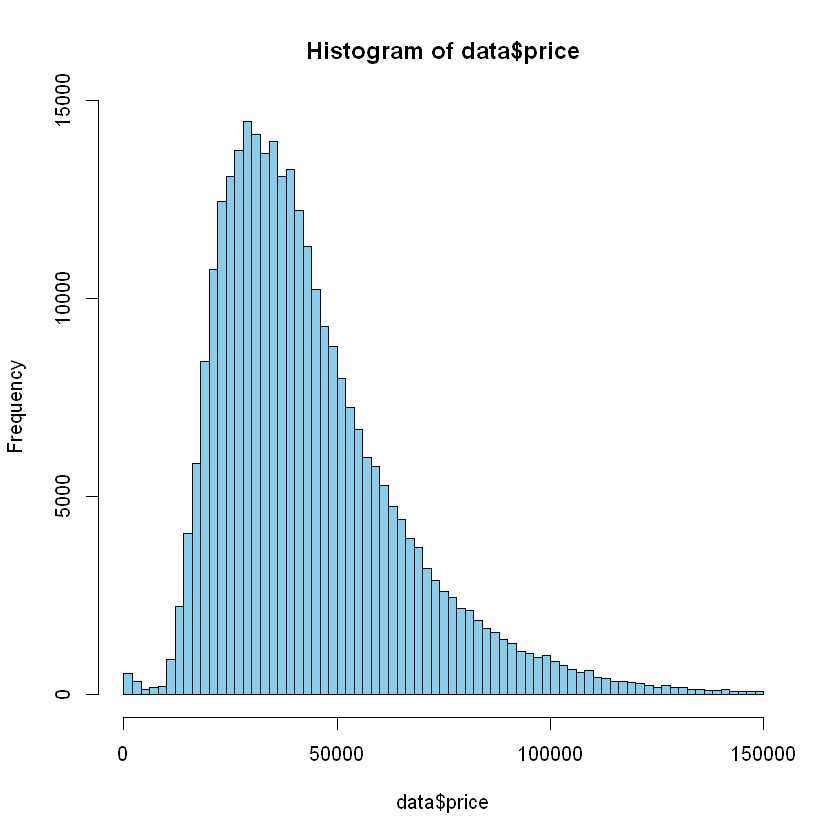

In [34]:
hist(data$price,col='skyblue',breaks = 60)

Checkin issue with total price

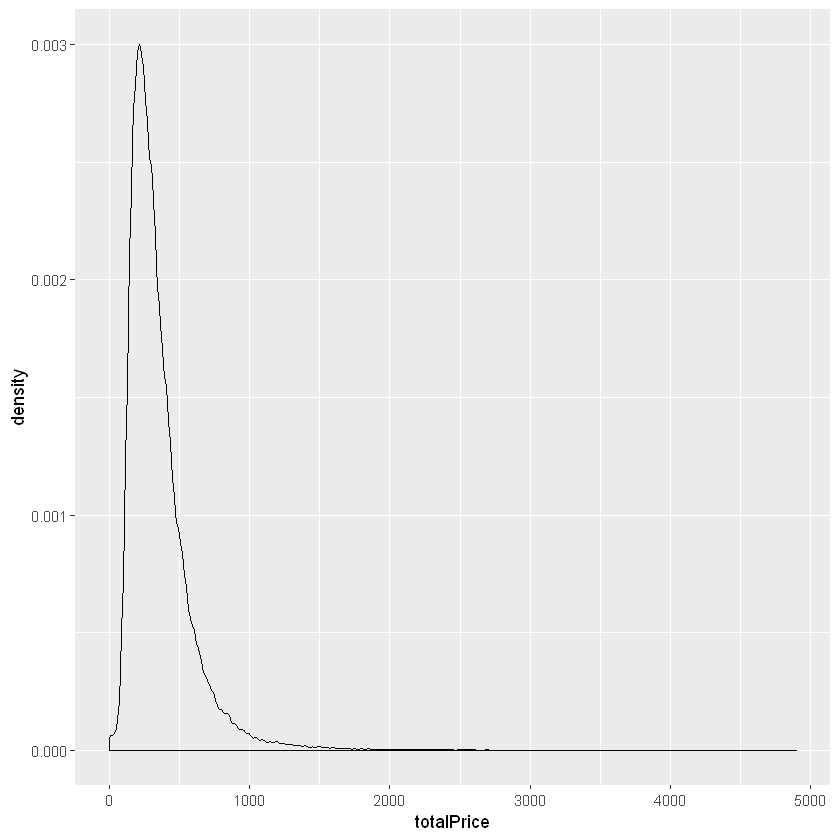

In [35]:
ggplot(data = data,mapping = aes(x=totalPrice))+geom_density()

storing the data

In [36]:
write.csv(x = data,file = "cleaned_beijing.csv")